In [11]:
import seaborn as sns #The library om grafieken te maken 
import pandas as pd 
import matplotlib.pyplot as plt #Benodigd voor het plaatsen van labels op Seaborn grafieken
import sklearn as sk #De meest populaire library voor statistik en machine learning



<font color='lightblue'>^Importeren van alle libraries</font>

In [12]:
df1 = pd.read_csv(('steps.csv'), delimiter= ';') #scheidingsteken is ;
df1.head() #laat eerste 5 records zien


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='lightblue'>^Lezen van steps.csv, waarin per ID-nummer het aantal stappen per dag te zien zijn.</font>

In [13]:
df2 = pd.read_csv('survey.csv')
df2.head() #laat eerste 5 records zien

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


<font color='lightblue'>^Lezen van survey.csv, waarin per ID-nummer informatie over de persoon te zien is (Woonplaats, geslacht, leeftijd enz.).</font>

In [14]:
df = pd.merge(df1, df2, on = 'id')
df.head() #Laat de eerste 5 records zien

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


<font color='lightblue'>^Samenvoegen van df1(steps.csv) en df2(survey.csv) op de kolom 'id'.</font>

In [4]:
df['weight'].value_counts()

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
116.0     1
128.0     1
115.0     1
101.0     1
20.0      1
Name: weight, Length: 72, dtype: int64

<font color='lightblue'>^Tellen hoe vaak een gewichtswaarde voorkomt in de dataset. Hierbij valt op dat er een aantal uitschieters zijn (116kg, 128kg, 115kg en 20kg).</font>

In [5]:
# The handy Pandas function to_numeric converts non-numeric data to NaN. The last argument overrides the errors
# Python would normally generate.
# The apply method of a dataframe lets us apply a function to all the elements.
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

<font color='lightblue'>^Met de code .to_numeric worden niet-numerieke waarden in de dataset omgezet naar een NaN waarde. Deze waarden geven een foutmelding, maar met de code errors='coerce' worden deze foutmeldingen overschreven.
Vervolgens wordt met de formule .applt d efunctie toegepast op alle elementen.</font>

In [15]:

def outliers(x):
    if(x < 35.0) or (x > 150.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(outliers)

<font color='lightblue'>^Met deze code worden records die buiten het gemiddelde (lichter dan 35kg of zwaarder dan 150kg)van de dataset liggen eruit gefilterd.</font>

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


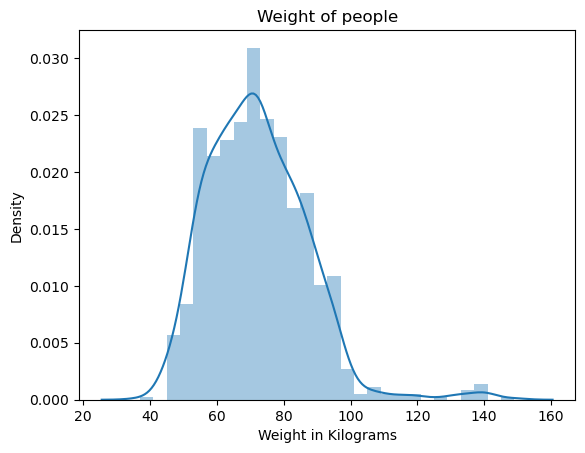

In [16]:
sns.distplot(df['weight']) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('Weight of people')
plt.xlabel('Weight in Kilograms')
plt.show()

<font color='lightblue'>^Met deze code wordt een distplot gemaakt, waarbij de spreiding van gewicht te zien is, wat eigenlijk een visualisatie van value_counts in het vorige deel. Hierbij valt op dat de meeste mensen bijna 80kg wegen.</font>

In [21]:
df['mean_steps'] = df.iloc[:,1:329].mean(axis=1) #1
df['median_steps'] = df.iloc[:,1:329].median(axis=1) #2
df['mean_steps'] = df['mean_steps'].apply(pd.to_numeric, errors='coerce')#3
mean_stepsline = df['mean_steps'].mean() #4
median_stepsline = df['median_steps'].median() #5
def above_18k_under1k(x): #6
    if(x > 18000.0) or (x < 1000): 
        return float('NaN')
    else: 
        return x
df['mean_steps'] = df['mean_steps'].apply(above_18k_under1k)

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,mean_steps,median_steps
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,9860.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,5374.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,8220.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,3000.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,4986.5


<font color='lightblue'>^Met deze code wordt er allereerst een subset van het gemiddeld aantal stappen per participant gemaakt (#1). Vervolgens wordt er ook een subset van de mediaan van het aantal stappen per participant gemaakt (#2). Vervolgens worden alle waarden in de subset omgezet naar numerieke waarden en worden alle niet-numerieke waarden omgezet naar NaN, waarna deze foutieve waarden worden voerscheven met de formule errors='coerce' (#3).
Bij #4 wordt het gemiddelde van alle participanten berekend en bij #5 de mediaan van alle participanten.
Bij #6 worden alle 'outliers' (dagen met minder dan 1000 stappen of dagen met meer dan 18000 stappen) eruit gefilterd. </font>

c:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


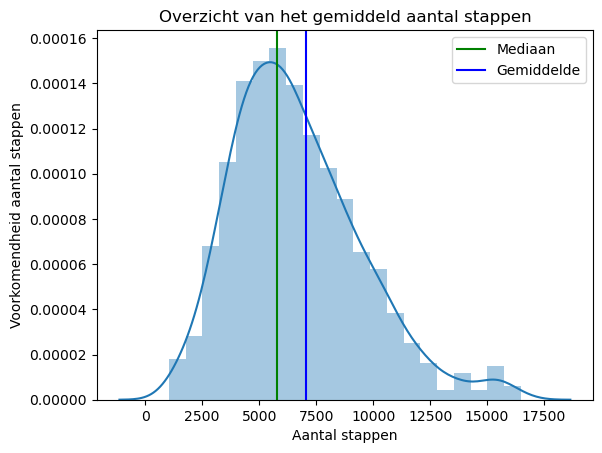

In [27]:
sns.distplot(df['mean_steps'])
plt.title('Overzicht van het gemiddeld aantal stappen') 
plt.xlabel('Aantal stappen')
plt.ylabel('Voorkomendheid aantal stappen')
plt.axvline(median_stepsline, 0, 100, color='green', label='Mediaan')  
plt.axvline(mean_stepsline, 0, 100, color='blue', label='Gemiddelde') 
plt.legend() 
plt.show()


<font color='lightblue'>^Met deze code wordt er een distplot gemaakt van het gemiddeld aantal stappen per participant. Vervolgens wordt de lijn van het totale gemiddelde en de lijn van de totale mediaan geplot, welke in het vorige deel code zijn geformuleerd. Met de formule label="..." wordt er een naam in de legenda toegevoegd en met de formule plt.legend() wordt de legenda getoond.</font>

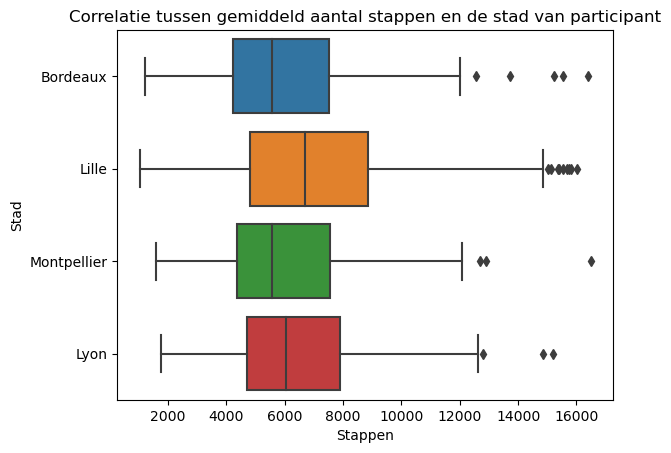

In [30]:
sns.boxplot(data=df, y='city' ,x='mean_steps') 
plt.title('Correlatie tussen gemiddeld aantal stappen en de stad van participant')
plt.ylabel('Stad')
plt.xlabel('Stappen')
plt.show()

<font color='lightblue'>^Met deze code wordt er een boxplot geplot. In deze boxplot wordt de correlatie getoond tussen de stad waarin de participanten wonen en het gemiddeld aantal stappen dat de participanten zetten.</font>

<font color='Red'>Toelichting: In deze boxplot is te zien dat de 4 steden dicht bij elkaar liggen, waarbij Lille als 'winnaar' uit de barplot komt met het meest gemiddeld aantal stappen. Wat opvalt is dat bij Lille de spreiding van het aantal stappen het hoogst, maar dat de mediaan dan alsnog het hoogst is. Wat ook opvalt is dat Montpellier en Bordeaux erg veel overeenkomsten tonen qua gezette stappen. Als je dit verglijkt met de locatie van de steden valt op Montpellier en Bordeaux beide (dicht bij) de zee liggen, terwijl Lille en Lyon niet dichtbij de zee liggen. </font>

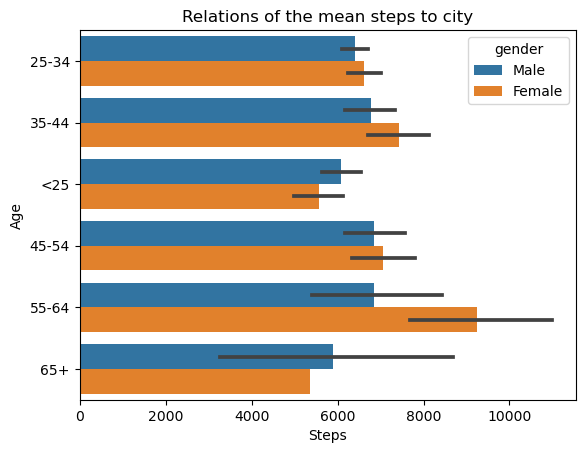

In [31]:
sns.barplot(data=df, y='age' ,x='mean_steps',hue='gender') 
plt.title('Correlatie tussen gemiddeld aantal stappen en de leeftijd')
plt.ylabel('Age')
plt.xlabel('Steps')
plt.show()

<font color='lightblue'>^Met deze code wordt er een barplot gemaakt van de correlatie tussen de leeftijd van mannen en vrouwen en het aantal stappen dat de participeanten zetten.</font>

<font color='Red'>Toelichting: De grafiek laat zien dat er over het algemeen veel overeenkomsten zijn tussen het aantal stappen dat mannen en vrouwen zetten, behalve in de leeftijdscategorie 55-64, waarbij vrouwen veel meer stappen zetten dan mannen. Verder is ook te zien dat mannen & vrouwen in de leeftijdscategorie 55-64 gemiddeld het meest aantal stappen zetten per participant.</font>